## Observations and Insights  

1. Capomulin and Ramicane had more test measuresed then any other drug. They also have the lowest mean tumor volume size out of all the other drugs.

2. We also notice that as time increases the tumor size when using capomulin decreases.

3. There is also similiraty between wieght and size of the tumor. It is likely that the greater the wieght the larger the tumor can will be. 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_and_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_and_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice.
mouse_and_study["Mouse ID"].count()

1893

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_and_study.loc[mouse_and_study.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 



In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_and_study.drop_duplicates(["Mouse ID", "Timepoint"], keep=False)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Checking the number of mice in the clean DataFrame.
mouse_and_study["Mouse ID"].count() 

1893

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_mean = mouse_and_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
stats_median = mouse_and_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
stats_var = mouse_and_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stats_stdev = mouse_and_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
stats_sem = mouse_and_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

stats_summery_df = pd.DataFrame({"mean": stats_mean,
                                "median": stats_median,
                                "variance": stats_var,
                                "Standard Deviation": stats_stdev,
                                "SEM": stats_sem})

stats_summery_df

,mean,median,variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_and_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

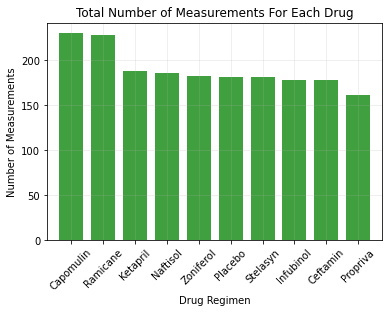

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_and_study["Drug Regimen"].value_counts().plot(kind="bar", color="g", align="center", alpha=.75,
                                                    rot=45, width=.75)
plt.grid(alpha=.25)
plt.xlim(-0.75, len(mouse_and_study["Drug Regimen"].value_counts())-0.25)
plt.title("Total Number of Measurements For Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()


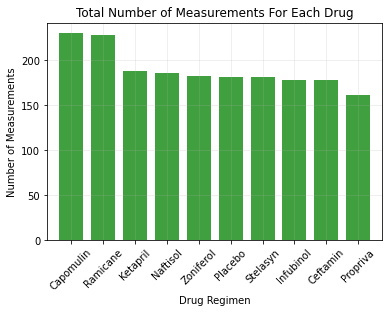

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_tested = mouse_and_study["Drug Regimen"].value_counts()
x_axis = list(mice_tested.index.values)

plt.bar(x_axis, mice_tested, color="g", align="center", alpha=.75, width=.75)
plt.grid(alpha=.25)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xticks(x_axis, rotation=45)
plt.title("Total Number of Measurements For Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()


<AxesSubplot:title={'center':'Distribution of Female vs. Male Mice'}, ylabel='Sex'>

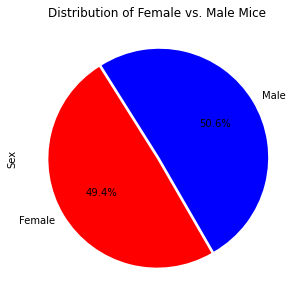

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_and_study["Sex"].value_counts().plot(kind="pie", startangle=-60, colors=["blue", "red"],
                                            autopct="%1.1f%%", labels=["Male", "Female"], explode=[.025,0],
                                            title="Distribution of Female vs. Male Mice", figsize=[5, 5])


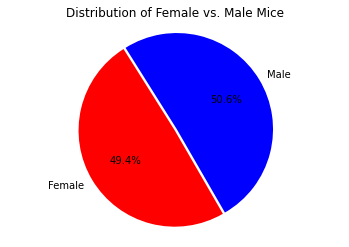

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice = mouse_and_study["Sex"].value_counts()
labels= mouse_and_study["Sex"].unique()
colors= ["blue", "red"]
explode= [.025, 0]

plt.pie(gender_mice, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=-60)
plt.axis("equal")
plt.title("Distribution of Female vs. Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = mouse_and_study.loc[(mouse_and_study["Drug Regimen"]=="Capomulin") | 
                               (mouse_and_study["Drug Regimen"]=="Ramicane") |
                               (mouse_and_study["Drug Regimen"]=="Infubinol") | 
                               (mouse_and_study["Drug Regimen"]=="Ceftamin")]



# Start by getting the last (greatest) timepoint for each mouse
max_tp = drug_regimens.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_regimens = pd.merge(drug_regimens, max_tp, how="right", on=["Mouse ID", "Timepoint"])
drug_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = drug_regimens["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:    
    tumor_vol_data.append(drug_regimens.loc[drug_regimens["Drug Regimen"] == drug]["Tumor Volume (mm3)"])   
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)  

C:\Users\willi\AppData\Local\Temp\ipykernel_9500\2824996587.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


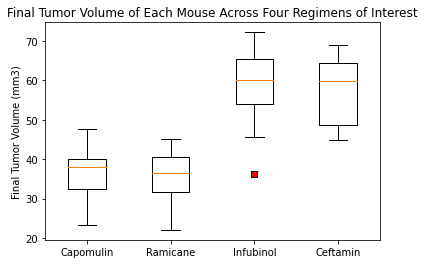

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outliers = dict(markerfacecolor = "r", marker = "s")
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(treatments)
ax1.boxplot(tumor_vol_data, flierprops = outliers)
plt.show()

## Line and Scatter Plots

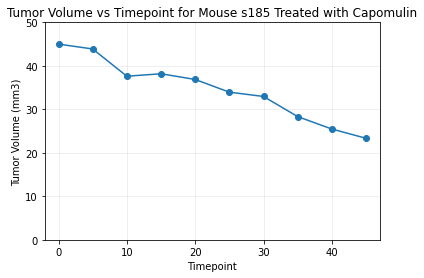

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = mouse_and_study.loc[mouse_and_study["Drug Regimen"] == "Capomulin"]

treated_mouse = "s185"
selected_mouse = capomulin_mouse.loc[capomulin_mouse["Mouse ID"] == treated_mouse]

plt.plot(selected_mouse["Timepoint"], selected_mouse["Tumor Volume (mm3)"], marker="o")
plt.grid(alpha=.25)
plt.xlim(-2, max(selected_mouse["Timepoint"]) + 2)
plt.ylim(0, max(selected_mouse["Tumor Volume (mm3)"]) + 5)
plt.title(f"Tumor Volume vs Timepoint for Mouse {treated_mouse} Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

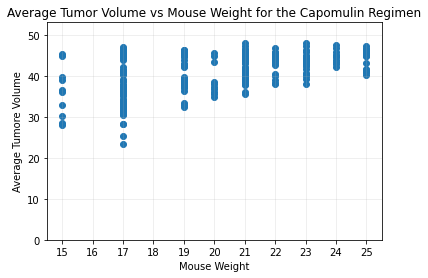

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_mouse["Weight (g)"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumore Volume")
plt.ylim(0, max(capomulin_mouse["Tumor Volume (mm3)"])+5)
plt.xticks(np.arange(min(capomulin_mouse["Weight (g)"]), max(capomulin_mouse["Weight (g)"])+1, 1.0))
plt.grid(alpha=.25)
plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_mouse["Weight (g)"]
tumor_volume = capomulin_mouse["Tumor Volume (mm3)"]

correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation coefficient between mouse weight and tumor volume is {round(correlation[0], 2)}")

The correlation coefficient between mouse weight and tumor volume is 0.53


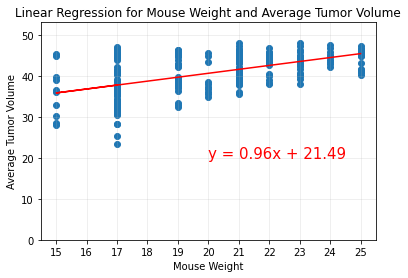

In [43]:
# Regression model
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.grid(alpha=.25)
plt.ylim(0, max(capomulin_mouse["Tumor Volume (mm3)"]) + 5)
plt.xticks(np.arange(min(capomulin_mouse["Weight (g)"]), max(capomulin_mouse["Weight (g)"]) + 1, 1.0))
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Linear Regression for Mouse Weight and Average Tumor Volume")
plt.show()